<a href="https://colab.research.google.com/github/yash722/Adopt-It/blob/main/Pet_Shelter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.8 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=591aa4c4e33b03a728757aafad272878aa307c26d9f7938a7365fdd0d16c75c5
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import math
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Distance Metrics
def euclidean_dist_arranged(df, arr, feature_space):
  dist = []
  for i in range(feature_space.shape[0]):
    dist.append([i, math.sqrt(np.sum((feature_space[i] - arr)**2))])
  dist = sorted(dist, key = lambda x:x[1])
  dist = np.array(dist)
  return df.iloc[dist[:8, 0]]

def cosine_similarity_arranged(df, arr, feature_space):
  dist = []
  for i in range(feature_space.shape[0]):
    sim = np.dot(arr, feature_space[i])/(np.linalg.norm(arr)*np.linalg.norm(feature_space[i]))
    dist.append([i, sim])
  dist = sorted(dist, key = lambda x:x[1])
  dist = np.array(dist)
  return df.iloc[dist[-8:, 0]]

In [ ]:
df_dogs = pd.read_csv("drive/MyDrive/Pet-Shelter/Dogs_From_MSPCA.csv")
df_dogs["Image Name"] = ""
df_dogs_names = df_dogs["Name"].values
for i in range(df_dogs_names.shape[0]):
  df_dogs.iat[i, -1] = df_dogs_names[i] + "_" + str(i) + ".jpg"

In [ ]:
df_dogs.head()

,Name,Breed,Location,Gender,Age,Weight,Image,Description,Image Name
0,Wendy,Great Dane / Pit Bull Terrier,Nevins Farm,Female,5 Years,88.18,https://www.mspca.org/wp-content/uploads/2023/...,If you haven’t yet met Wendy– you’re missing ...,Wendy_0.jpg
1,Rilee,Pit Bull Terrier,Nevins Farm,Female,7 Years,68.12,https://www.mspca.org/wp-content/uploads/2023/...,Rilee is a happy girl that loves to give kiss...,Rilee_1.jpg
2,Georgie,Labrador Retriever Mix,Cape Cod,Male,8 Years,69.45,https://www.mspca.org/wp-content/uploads/2023/...,This happy guy is as smart as he is handsome!...,Georgie_2.jpg
3,Skylar,Pit Bull Terrier,Nevins Farm,Female,1 Years,18.74,https://www.mspca.org/wp-content/uploads/2023/...,"Smart, sweet and cute are all fitting words t...",Skylar_3.jpg
4,Ace,Pit Bull Terrier,Nevins Farm,Male,1 Years,59.52,https://www.mspca.org/wp-content/uploads/2023/...,"Handsome, energetic, and fun, thats our boy A...",Ace_4.jpg


In [ ]:
df_dogs["Description"] = list(map(str, df_dogs["Description"].values))
df_dogs["Desc_Len"] = list(map(len, df_dogs["Description"].values))

In [ ]:
df_dogs = df_dogs[df_dogs["Desc_Len"] > 3]

In [ ]:
df_dogs.shape

(51, 10)

In [ ]:
df_dogs = df_dogs.reset_index()
df_dogs

,index,Name,Breed,Location,Gender,Age,Weight,Image,Description,Image Name,Desc_Len
0,0,Wendy,Great Dane / Pit Bull Terrier,Nevins Farm,Female,5 Years,88.18,https://www.mspca.org/wp-content/uploads/2023/...,If you haven’t yet met Wendy– you’re missing ...,Wendy_0.jpg,1708
1,1,Rilee,Pit Bull Terrier,Nevins Farm,Female,7 Years,68.12,https://www.mspca.org/wp-content/uploads/2023/...,Rilee is a happy girl that loves to give kiss...,Rilee_1.jpg,1060
2,2,Georgie,Labrador Retriever Mix,Cape Cod,Male,8 Years,69.45,https://www.mspca.org/wp-content/uploads/2023/...,This happy guy is as smart as he is handsome!...,Georgie_2.jpg,1009
3,3,Skylar,Pit Bull Terrier,Nevins Farm,Female,1 Years,18.74,https://www.mspca.org/wp-content/uploads/2023/...,"Smart, sweet and cute are all fitting words t...",Skylar_3.jpg,1044
4,4,Ace,Pit Bull Terrier,Nevins Farm,Male,1 Years,59.52,https://www.mspca.org/wp-content/uploads/2023/...,"Handsome, energetic, and fun, thats our boy A...",Ace_4.jpg,698
5,5,Joule,Boxer / Pit Bull Terrier,Nevins Farm,Female,5 Months,20.00,https://www.mspca.org/wp-content/uploads/2023/...,"Meet young puppy Joule! Joule is happy, bounc...",Joule_5.jpg,1141
6,6,Nala,German Shepherd Dog Mix,Boston,Female,4 Years,72.53,https://www.mspca.org/wp-content/uploads/2023/...,"Nala is large and in charge, and is ready to ...",Nala_6.jpg,1158
7,7,Daisy,Beagle / Catahoula Leopard Hound,Nevins Farm,Female,7 Months,48.28,https://www.mspca.org/wp-content/uploads/2023/...,Daisy is a spunky young pup ready to go home!...,Daisy_7.jpg,1489
8,8,Tammy,American Pit Bull Terrier Mix,Salem,Female,1 Years,44.53,https://www.mspca.org/wp-content/uploads/2023/...,Weight: 39 lbs Are you ready to bring a bundl...,Tammy_8.jpg,1730
9,9,Rose,Labrador Retriever Mix,Salem,Female,1 Years,61.29,https://www.mspca.org/wp-content/uploads/2023/...,"Meet Rose, a charming one-year-old female dog...",Rose_9.jpg,663


In [ ]:
image_data = []
for i in df_dogs["Image Name"].values:
  image_path = f"drive/MyDrive/Pet-Shelter/Dog_Images/{i}"
  img = image.load_img(image_path, target_size=(224, 224))
  img = image.img_to_array(img)
  image_data.append(img)

image_data = np.array(image_data).reshape(df_dogs.shape[0], 224, 224, 3)
print(image_data.shape)

(51, 224, 224, 3)


In [ ]:
image_model = Sequential()

In [ ]:
image_model.add(ResNet50(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3)))
image_model.add(GlobalAveragePooling2D())

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
image_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 23534592 (89.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
image_features = []
for i in range(image_data.shape[0]):
  print(f"Working on image -> {i+1}")
  img = np.expand_dims(image_data[i], axis = 0)
  features = image_model.predict(img)
  image_features.append(features)

image_features = np.array(image_features).flatten().reshape(image_data.shape[0], 2048)

Working on image -> 1
1/1 [==============================] - 3s 3s/step
Working on image -> 2
1/1 [==============================] - 0s 195ms/step
Working on image -> 3
1/1 [==============================] - 0s 274ms/step
Working on image -> 4
1/1 [==============================] - 0s 187ms/step
Working on image -> 5
1/1 [==============================] - 0s 214ms/step
Working on image -> 6
1/1 [==============================] - 0s 252ms/step
Working on image -> 7
1/1 [==============================] - 0s 304ms/step
Working on image -> 8
1/1 [==============================] - 0s 348ms/step
Working on image -> 9
1/1 [==============================] - 0s 317ms/step
Working on image -> 10
1/1 [==============================] - 0s 305ms/step
Working on image -> 11
1/1 [==============================] - 0s 326ms/step
Working on image -> 12
1/1 [==============================] - 0s 301ms/step
Working on image -> 13
1/1 [==============================] - 0s 316ms/step
Working on image -> 14
1

In [ ]:
image_features.shape

(51, 2048)

In [ ]:
np.save("dog_image_features.npy", image_features)

In [ ]:
image_features = np.load("drive/MyDrive/Pet-Shelter/dog_image_features.npy")
image_features.shape

(51, 2048)

In [ ]:
# Learn how to implement BERT model to get text descriptions concatenate with image vector -> feature vector
# Take Input from User
# See Similarity Scores and give recommendations

In [ ]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

.gitattributes:   0%|          | 0.00/391 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
bert_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [ ]:
desc = df_dogs["Description"].values
desc.shape

(51,)

In [ ]:
text_embeddings_features = bert_model.encode(desc)

In [ ]:
np.save("dog_text_features.npy", text_embeddings_features)

In [ ]:
text_embeddings_features = np.load("drive/MyDrive/Pet-Shelter/dog_text_features.npy")
text_embeddings_features.shape

(51, 768)

In [ ]:
feature_space = []
for i in range(df_dogs.shape[0]):
  features_conc = np.concatenate((image_features[i], text_embeddings_features[i]), axis = None)
  feature_space.append(features_conc)

feature_space = np.array(feature_space)
feature_space.shape

(51, 2816)

In [ ]:
np.save("drive/MyDrive/Pet-Shelter/dog_combined_features.npy", feature_space)

In [ ]:
test_image_path = "/content/drive/MyDrive/Pet-Shelter/pexels-svetozar-milashevich-1490908.jpg"
test_img = image.load_img(test_image_path, target_size=(224, 224))
test_img = image.img_to_array(test_img)
test_img.shape

(224, 224, 3)

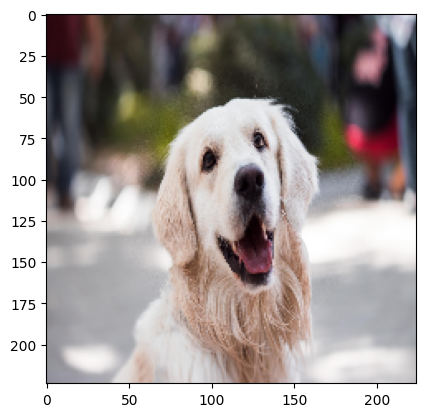

In [ ]:
#Seeing the resized image
plt.imshow(np.array(test_img, np.int32))

In [ ]:
test_img2 = np.expand_dims(test_img, axis = 0)
image_features = image_model.predict(test_img2)

1/1 [==============================] - 0s 180ms/step


In [ ]:
image_features.shape

(1, 2048)

In [ ]:
test_text = "I'd like to see a dog that can hang around with other two dogs I have. A enrgetic pup to light up my life."

In [ ]:
text_features = bert_model.encode(test_text)

In [ ]:
text_features.shape

(768,)

In [ ]:
test_combined_features = np.concatenate((image_features, text_features), axis=None)
test_combined_features.shape

(2816,)

In [ ]:
feature_space = np.load("drive/MyDrive/Pet-Shelter/dog_combined_features.npy")
feature_space.shape

(51, 2816)

In [ ]:
# dist = []
# for i in range(feature_space.shape[0]):
#   dist.append([i, euclidean_dist(feature_space[i], test_combined_features)])

# dist = sorted(dist, key = lambda x:x[1])

In [ ]:
euclidean_dist_arranged(df_dogs, test_combined_features, feature_space)

,index,Name,Breed,Location,Gender,Age,Weight,Image,Description,Image Name,Desc_Len
30,30,Chester,Labrador Retriever Mix,Salem,Male,5 Months,29.10,https://www.mspca.org/wp-content/uploads/2023/...,"Meet Chester, a pup with an infectious spirit...",Chester_30.jpg,606
47,50,Colors,Siberian Husky Mix,Salem,Male,10 Months,39.68,https://www.mspca.org/wp-content/uploads/2023/...,"Introducing Colors, an energetic and charisma...",Colors_50.jpg,925
42,45,Joseph,Siberian Husky Mix,Salem,Male,1 Years,39.68,https://www.mspca.org/wp-content/uploads/2023/...,"Introducing Joseph, a handsome male dog who h...",Joseph_45.jpg,1033
26,26,Reba,Labrador Retriever Mix,Salem,Female,5 Months,22.60,https://www.mspca.org/wp-content/uploads/2023/...,* MUST GO HOME WITH ANOTHER CANINE FRIEND 🙂 *...,Reba_26.jpg,898
22,22,Charlie,Australian Cattle Dog Mix,Cape Cod,Male,1 Years,79.37,https://www.mspca.org/wp-content/uploads/2023/...,"Meet Charlie! He is a bundle of energy, alway...",Charlie_22.jpg,862
41,43,Dolly,Pit Bull Terrier Mix,Salem,Female,3 Years,41.89,https://www.mspca.org/wp-content/uploads/2023/...,"Meet Dolly, an affectionate and people-friend...",Dolly_43.jpg,1153
31,31,Sneakers,Beagle Mix,Salem,Male,5 Months,18.74,https://www.mspca.org/wp-content/uploads/2023/...,"Meet our newest canine resident, an adorable ...",Sneakers_31.jpg,810
13,13,Bozo,Pit Bull Terrier Mix,Salem,Male,1 Years,44.97,https://www.mspca.org/wp-content/uploads/2023/...,"Meet Bozo, an energetic and exuberant young m...",Bozo_13.jpg,940


In [ ]:
cosine_similarity_arranged(df_dogs, test_combined_features, feature_space)

,index,Name,Breed,Location,Gender,Age,Weight,Image,Description,Image Name,Desc_Len
41,43,Dolly,Pit Bull Terrier Mix,Salem,Female,3 Years,41.89,https://www.mspca.org/wp-content/uploads/2023/...,"Meet Dolly, an affectionate and people-friend...",Dolly_43.jpg,1153
24,24,Luna,Siberian Husky,Cape Cod,Female,9 Months,43.65,https://www.mspca.org/wp-content/uploads/2023/...,Luna\n10 Months Old\nSpayed Female Introducin...,Luna_24.jpg,1261
42,45,Joseph,Siberian Husky Mix,Salem,Male,1 Years,39.68,https://www.mspca.org/wp-content/uploads/2023/...,"Introducing Joseph, a handsome male dog who h...",Joseph_45.jpg,1033
31,31,Sneakers,Beagle Mix,Salem,Male,5 Months,18.74,https://www.mspca.org/wp-content/uploads/2023/...,"Meet our newest canine resident, an adorable ...",Sneakers_31.jpg,810
47,50,Colors,Siberian Husky Mix,Salem,Male,10 Months,39.68,https://www.mspca.org/wp-content/uploads/2023/...,"Introducing Colors, an energetic and charisma...",Colors_50.jpg,925
22,22,Charlie,Australian Cattle Dog Mix,Cape Cod,Male,1 Years,79.37,https://www.mspca.org/wp-content/uploads/2023/...,"Meet Charlie! He is a bundle of energy, alway...",Charlie_22.jpg,862
37,37,Snowky,Alaskan Malamute Mix,Boston,Male,8 Years,56.88,https://www.mspca.org/wp-content/uploads/2023/...,Meet Snowky! This fluffy-haired beauty can`t ...,Snowky_37.jpg,1574
30,30,Chester,Labrador Retriever Mix,Salem,Male,5 Months,29.10,https://www.mspca.org/wp-content/uploads/2023/...,"Meet Chester, a pup with an infectious spirit...",Chester_30.jpg,606
